## Outline

- **Python Libraries for Network Analysis**
    - pandas
    - matplotlib.pyplot
- **Data Understanding** 
    - Data overview
- **Data Preprocessing**
    - Identifying and handling missing values
    - Data Summarising
    - Data transformation
- **knowledge extraction**
    - Statistical tests
    - Insight

In [36]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

# Matplotlib Settings
plt.style.use(["seaborn-ticks"])
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.which"] = "both"
plt.rcParams["grid.linestyle"] = "--"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["figure.figsize"] = (7.5, 5)
plt.rcParams["figure.dpi"] = 150
plt.rcParams["figure.autolayout"] = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.frameon"] = True
plt.rcParams["legend.loc"] = "best"
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.titlesize"] = "x-large"
sns.set(rc=dict(plt.rcParams))


-Reads the input file `with open` and processes the edges in a single pass, using the `map` function to convert the edge list to a list of `tuple` of integers, `sorted` in ascending order. Creating a graph object using `nx_graph`. The resulting list is then converted to a `set` to remove any duplicate edges.

In [17]:
with open("social-network.csv", "r") as f:
    edge_list = [tuple(sorted(map(int, line.split(",")))) for line in f]  # Get list of edges
    edge_list = set(edge_list)  # Remove duplicates
    
    nx_graph = nx.from_edgelist(edge_list)  # Create Graph object
    
print(f"Number of edges: {nx_graph.number_of_edges()}")
print(f"Number of nodes: {nx_graph.number_of_nodes()}")


Number of edges: 2981
Number of nodes: 2888


<hr style="border:2px solid black"> </hr>

## Statistical Analysis

<hr style="border:1px solid black"> </hr>

## Degree Centrality



-To begin, a `Counter` object is created to track the frequency of each degree on the graph. It is then `print`s the frequency of each degree and the strongly related (`if > 100`) `nodes` using a list comprehension. Finally, the degree distribution is shown using the `sns.scatterplot` function.
<br>**Knowledge gained:** One observation to make is that there are no 0 degree nodes. There are 7 strongly linked nodes with a degree greater than 100, with the majority of the edges pointing towards leaf nodes.


Some Highly Connected Nodes: 
Node 603 is highly connected with a degree of 769
Node 1525 is highly connected with a degree of 710
Node 714 is highly connected with a degree of 139
Node 288 is highly connected with a degree of 481
Node 1 is highly connected with a degree of 287
Node 710 is highly connected with a degree of 221
Node 2687 is highly connected with a degree of 170


Text(0.5, 0, 'Degree')

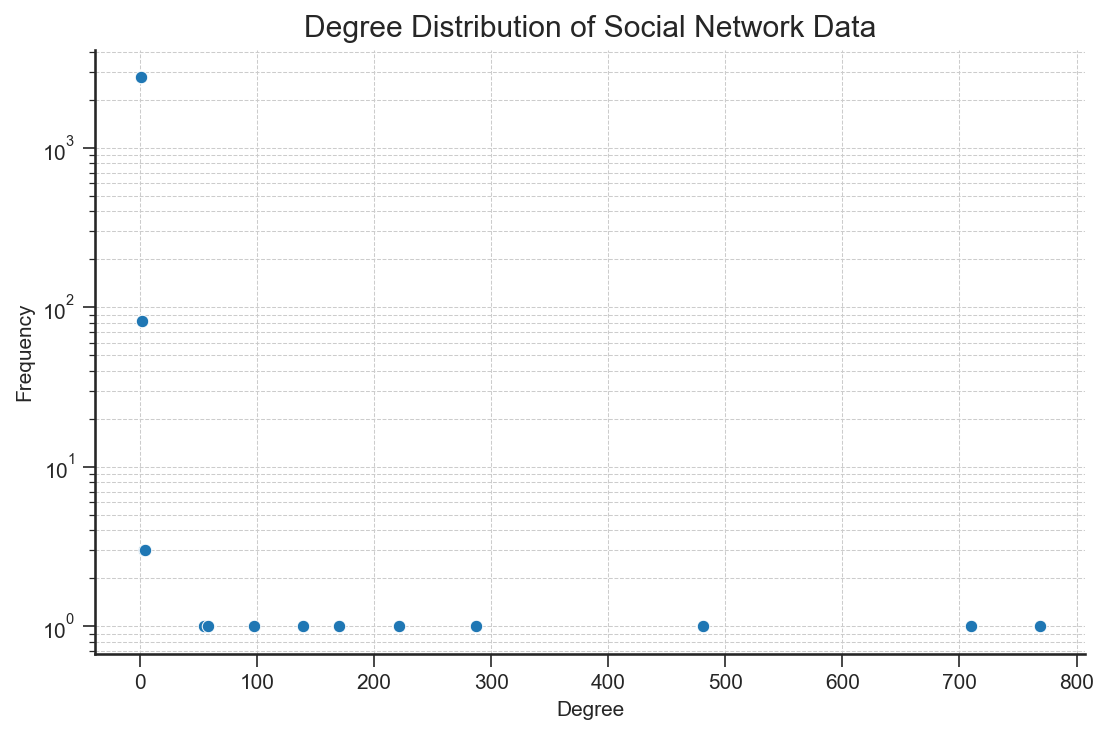

In [25]:
# Create a Counter object to count the frequency of each degree
degree_counts = Counter(nx_graph.degree())

# Print the highly connected nodes
print("\nSome Highly Connected Nodes: ")
highly = False
for node, degree in nx_graph.degree():
    if degree > 100:
        print(f"Node {node} is highly connected with a degree of {degree}")
        written = True
if not written:
    print("There are no highly connected nodes.")

# Plot the degree distribution
ddist = nx.degree_histogram(nx_graph)
sctr_plt = sns.scatterplot(x=range(len(ddist)), y=ddist, marker="o")
sctr_plt.set(yscale="log")
plt.title("Degree Distribution of Social Network Data")
plt.ylabel("Frequency")
plt.xlabel("Degree")


### Clustering Coefficient

-Take the average of all node scores to get the network clustering coefficient.
<br>-Given $E_N$ total edges between the node's neighbours and $k$ number of neighbours, the Clustering Coefficient of the node is determined as 
$$
C = \frac{2E_N}{k(k-1)}
$$
<br>-Social networks tend to form closely knit groupings with a relatively high density of linkages. As a result, the clustering coefficient is a useful metric for determining how tightly linked a given social network is.

-`nx.clustering`to get the statistic and gettting the average using `np.mean`. A new dataframe is created using `list`to `cluster_coeff.values()` and clustering and plotting a histogram `plt.hst` for Dolphin clustering.
<br>**Knowledge gained:** The average clustering coefficient of a network, which is a measure of the degree to which nodes in the network tend to cluster together. Over all Network Average Clustering Coefficient is 0.02725.

Network Average Clustering Coefficient: 0.02725


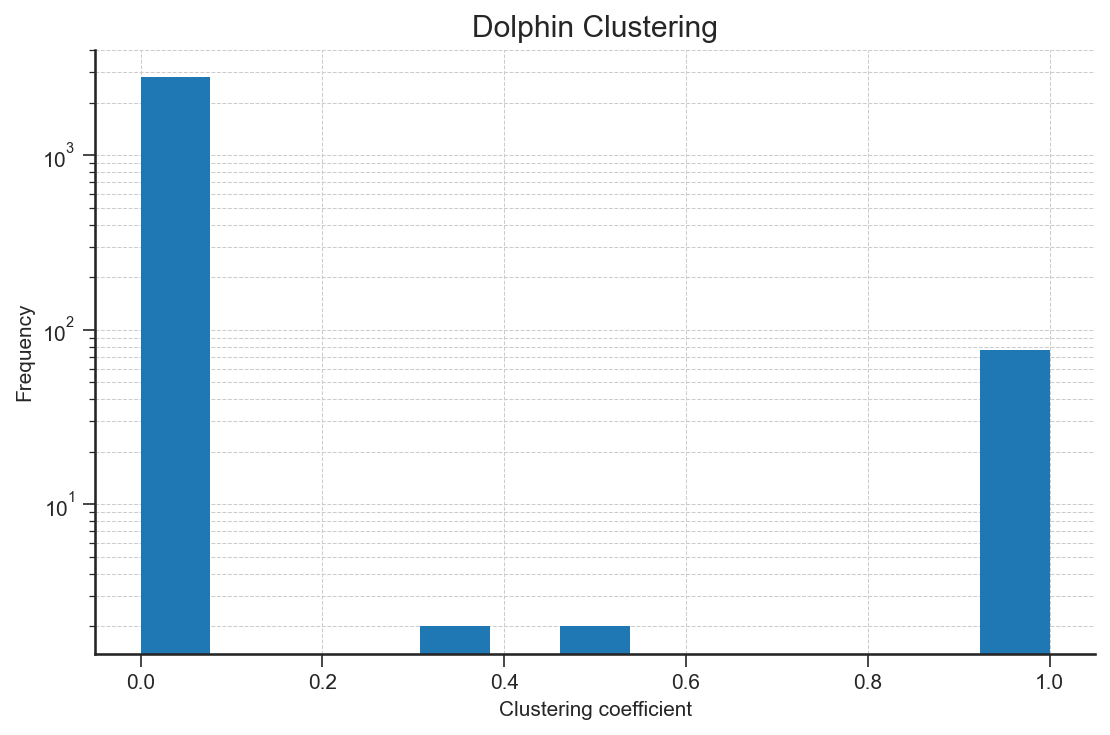

In [27]:
# Calculate the average clustering coefficient
cluster_coeff = nx.clustering(nx_graph)
mean_cluster_coeff = np.mean(list(cluster_coeff.values()))
print("Network Average Clustering Coefficient: {:.5f}".format(mean_cluster_coeff))

# Create a pandas dataframe with the clustering coefficients
df = pd.DataFrame(list(cluster_coeff.values()), columns=['clustering_coefficient'])

# Plot a histogram of the clustering coefficients using matplotlib
plt.hist(df['clustering_coefficient'], bins='auto')
plt.title("Dolphin Clustering")
plt.ylabel("Frequency")
plt.xlabel("Clustering coefficient")
plt.yscale("log")
plt.show()


### Assortativity


-The tendency of nodes in a network to link to other nodes that have comparable (attributes or qualities) to them is referred to as assortativity.
<br>-`Assortativity` in our social network refers to nodes (users) that link to other nodes with similar demographics.
Positive assortativity and negative assortativity are the two forms of assortativity. 
<br>-As in our social network, `positive assortativity` refers to nodes linking to other nodes with a comparable number of connections (same degree), i.e., with similar features. In contrast, `negative assortativity` refers to nodes that link with other dissimilar nodes in terms of degree or qualities.

In [32]:
assort_coeff = nx.degree_assortativity_coefficient(nx_graph)
print("The assortavity coefficient of the given network is: {:.5f}".format(assort_coeff))

The assortavity coefficient of the given network is: -0.66821


<hr style="border:2px solid black"> </hr>

## Visualisation

<hr style="border:1px solid black"> </hr>

-The algorithm then pulls from the dataframe a list of leaf nodes, which are nodes with a degree of one. A portion of the leaf nodes are jumbled and deleted from the graph. Finally, the graph is drawn with NetworkX's nx.draw function ().

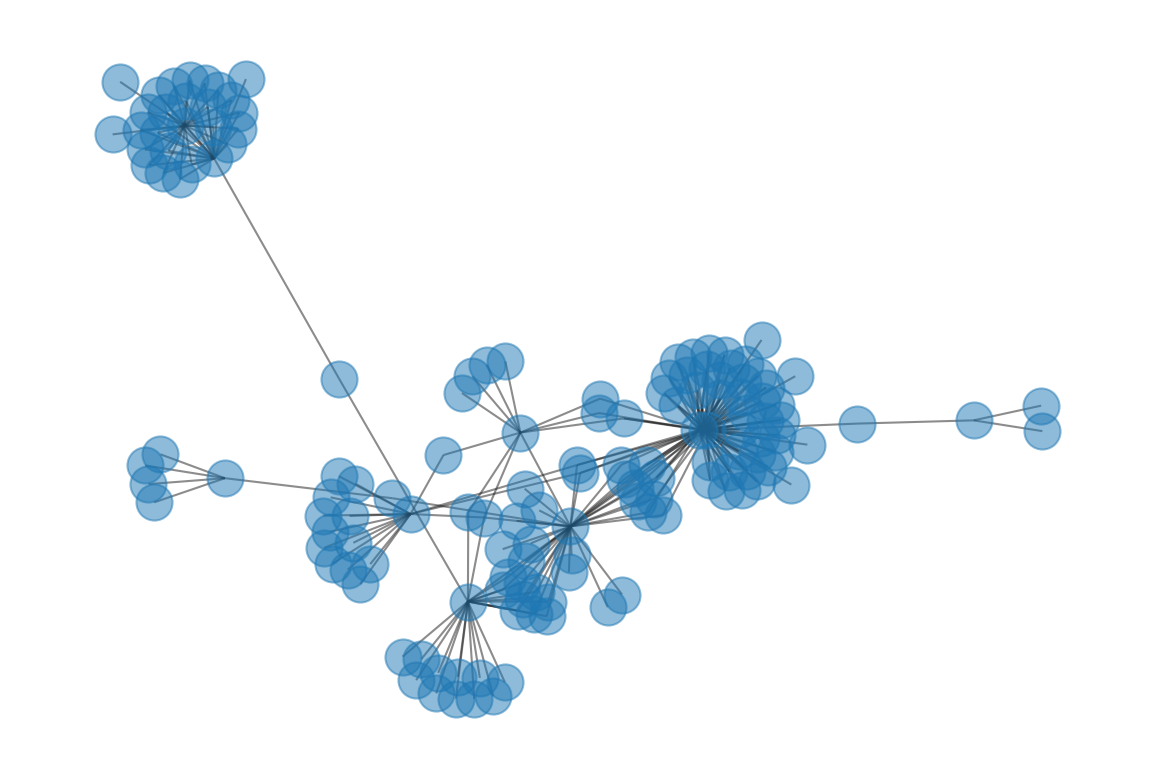

In [37]:
import random

node_de_df = pd.DataFrame(
    sorted(nx_graph.degree(), key=lambda x: x[1], reverse=True),
    columns=["Node", "Degree"],
)
# Get leaf nodes
leaf_nodes = list(node_de_df.loc[node_de_df['Degree'] == 1, 'Node'])

# Shuffle and remove nodes
random.shuffle(leaf_nodes)
leaf_nodes_to_remove = leaf_nodes[:-50]
nx_graph1 = nx_graph.copy()
nx_graph1.remove_nodes_from(leaf_nodes_to_remove)

# Plot the graph
layout = nx.spring_layout(nx_graph1)
nx.draw(nx_graph1, pos=layout, alpha=0.5)

**Reference:**

Source:https://cambridge-intelligence.com/keylines-faqs-social-network-analysis/
<br>Clustering Coefficient: https://www.geeksforgeeks.org/clustering-coefficient-graph-theory/